# Eveluation and further visulizatoin
of the optimized models (lr, SVC, RF) using image-like data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
#mpl.rcParams['xtick.labelsize'] = 8
#mpl.rcParams["image.cmap"] = 'gray'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

import datetime
date = datetime.datetime.now().strftime('%Y%m%d')

%matplotlib inline

# ML Gridsearch

## LR
The gridsearch is executed by grid_2d_lr.py and submit_raw.sh using cluster (no dask involved). The number of searched models is 2 (with or without PCA) * 10 (lr__C) * 5 (cv) = 100. It takes 12 minutes to finish the gridsearch. The best model is without PCA and stored as 2d_lr_model_20210520.joblib. The job log is slurm-52960.txt. 

In [3]:
lr_df = pd.read_csv('results/2d_lr_grid_20210520.csv', index_col=0)

In [15]:
data_df.param_pca[max_index]

nan

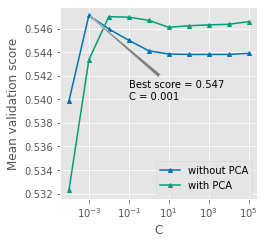

In [20]:
fig = plt.figure(figsize = (3.54, 3.54))

data_df = lr_df.copy()
x_col = 'param_lr__C'
max_index = np.argmax(data_df.mean_test_score)
plt.xscale('log')
#plt.ylim(0.545, 0.595)
#plt.yticks(np.linspace(0.4, 0.59, 4))

for label, mask in zip(['without PCA', 'with PCA'], [data_df.param_pca != 'PCA(n_components=50, whiten=True)', data_df.param_pca == 'PCA(n_components=50, whiten=True)']):
    xx = data_df.loc[mask, x_col].values.astype(float)
    yy = data_df.loc[mask, 'mean_test_score'].values.astype(float)
    plt.plot(xx, yy, marker = '^', ms = 4, label = label)

plt.ylabel('Mean validation score')
plt.xlabel('C')
plt.legend()

plt.annotate(text = 'Best score = {:.3f}\nC = {}'.format(data_df.mean_test_score[max_index], data_df.loc[max_index, x_col]),
             xy = (data_df.loc[max_index, x_col], data_df.mean_test_score[max_index]),
             xytext = (.1, 0.54), arrowprops=dict(facecolor='gray', arrowstyle = 'fancy')
            )
#fig.subplots_adjust(wspace = 0.05)
fig.savefig('results/2d_lr_grid_combined_{}.png'.format(date))

The performance of the models with PCA superior without PCA after C = 0.001, but not better than the best score in the models without PCA.

## RBF SVM
The gridsearch is executed by grid_svc.py and submit_svc.sh using cluster (no dask involved). The number of searched models is 2 (with or without PCA) * 6 (svc__gamma) * 6 (svc__C) * 5 (cv) = 360. It takes more than 30 hours to finish the gridsearch. The best model is with PCA and stored as 2d_svc_model_20210521.joblib. The job log is slurm-52972.txt. 

In [21]:
svc_df = pd.read_csv('results/2d_svc_grid_20210521.csv', index_col = 0)
len(svc_df)

72

In [24]:
svc_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,6255.326795,1189.224111,218.896601,34.690423,"PCA(n_components=50, whiten=True)",0.001,0.00001,"{'pca': PCA(n_components=50, whiten=True), 'sv...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,59
1,6608.943328,1618.436646,230.529453,42.549596,"PCA(n_components=50, whiten=True)",0.001,0.00010,"{'pca': PCA(n_components=50, whiten=True), 'sv...",0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,59
2,6701.678385,1638.402480,228.111150,41.751516,"PCA(n_components=50, whiten=True)",0.001,0.00100,"{'pca': PCA(n_components=50, whiten=True), 'sv...",0.087081,0.083333,0.083333,0.083234,0.083333,0.084063,0.001509,57
3,6005.892605,1352.654313,215.500488,40.721652,"PCA(n_components=50, whiten=True)",0.001,0.01000,"{'pca': PCA(n_components=50, whiten=True), 'sv...",0.303697,0.297315,0.275750,0.304373,0.324668,0.301161,0.015683,43
4,6811.515315,1025.846956,205.306306,24.659960,"PCA(n_components=50, whiten=True)",0.001,0.10000,"{'pca': PCA(n_components=50, whiten=True), 'sv...",0.141023,0.117523,0.120406,0.111818,0.094562,0.117066,0.014962,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,3377.050786,815.468973,762.292187,157.408538,NaN,100.000,0.00010,"{'pca': None, 'svc__C': 100.0, 'svc__gamma': 0...",0.542931,0.553171,0.514604,0.523573,0.580130,0.542882,0.023090,17
68,4188.917843,1286.009281,524.675302,146.290592,NaN,100.000,0.00100,"{'pca': None, 'svc__C': 100.0, 'svc__gamma': 0...",0.531440,0.557343,0.516429,0.523735,0.581751,0.542140,0.024143,18
69,13943.786460,3950.873125,506.930449,174.761499,NaN,100.000,0.01000,"{'pca': None, 'svc__C': 100.0, 'svc__gamma': 0...",0.506056,0.571931,0.478390,0.505394,0.520843,0.516523,0.030907,31
70,34118.852723,4707.188182,390.607358,43.877178,NaN,100.000,0.10000,"{'pca': None, 'svc__C': 100.0, 'svc__gamma': 0.1}",0.235394,0.226120,0.149239,0.163771,0.171968,0.189298,0.034749,46


In [23]:
np.max(svc_df.mean_test_score.astype(float))

0.5677951156143946

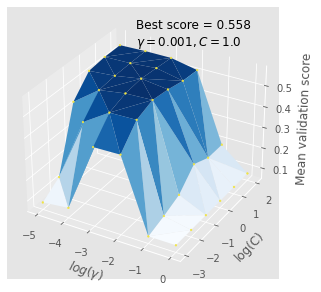

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca != 'PCA(n_components=50, whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, -2, .85, text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/2d_svc_grid_{}.png'.format(date))

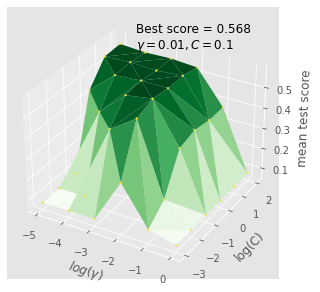

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'param_svc__gamma'].values.astype(float)
yy = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'param_svc__C'].values.astype(float)
zz = svc_df.loc[svc_df.param_pca == 'PCA(n_components=50, whiten=True)', 'mean_test_score'].values.astype(float)
max_index = np.argmax(zz)

surf = ax.plot_trisurf(np.log10(xx), np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(np.log10(xx), np.log10(yy), zz, c = 'C4', s = 3, alpha = 1)
# mark the best score
text = 'Best score = {:.3f}\n$\gamma = {}, C = {}$'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(-2, -2, .85,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, arrow_length_ratio=0.1, color='gray', alpha=.6)

ax.set_xlabel('$log(\gamma)$')
ax.set_ylabel('log(C)')
ax.set_zlabel('mean test score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)
fig.savefig('results/2d_svc+pca_grid_{}.png'.format(date))

## RandomForest (RF)
The gridsearch is implemented by grid_2d_rf.py and submit_2d.sh using cluster (no dask involved). Three amounts of n_estimators (100 (default), 1000, 5000) are searched. RF really comsumes a lot memory surign computation. The number of searched models is 2 (with or without PCA) * 3 (rf__n_estimators) * 3 (rf__max_depth) * 5 (cv) = 90. It takes 3.8 hours to finish the gridsearch. The best model is with PCA and stored as 2d_rf_model_20210522.joblib (694 MB). The job log is slurm-52975.txt.

Usually, n_estimators is the more the better generalization because it provides more regularization strength. However, the more n_estimators means more computation and memery loading. Although the 5000 n_estimators seems not reach the peak of rising trend and we might find some ways to solve the memory limit of cluster, I don't think it's sensible to persuit the higher n_estimators because the model's size will be too big for later applications.

In [30]:
rf_df = pd.read_csv('results/2d_rf_grid_20210522.csv', index_col = 0)

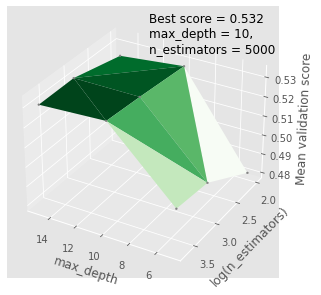

In [34]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9) # with PCA
fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Greens, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .535,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

#ax.set_zticks(np.linspace(0.47, 0.51, 5))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)
fig.savefig('results/2d_pca+rf_grid_{}.png'.format(date))

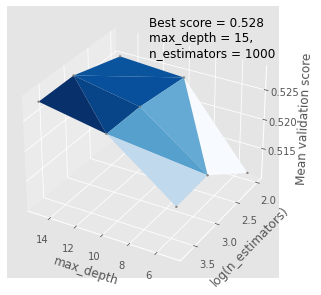

In [40]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

row_range = range(9,18) # without PCA
fig = plt.figure(figsize = (7,5))
ax = plt.gca(projection='3d')
xx = rf_df.param_rf__max_depth.values.astype(int)[row_range]
yy = rf_df.param_rf__n_estimators.values.astype(int)[row_range]
zz = rf_df.mean_test_score.values.astype(float)[row_range]
max_index = np.argmax(zz)

surf = ax.plot_trisurf(xx, np.log10(yy), zz, cmap = cm.Blues, linewidth = 0.1)
ax.scatter(xx, np.log10(yy), zz, c = 'grey', s = 3, alpha = 1)

# mark the best score
text = 'Best score = {:.3f}\nmax_depth = {},\nn_estimators = {}'.format(zz[max_index], xx[max_index], yy[max_index])
ax.text(12, 2.2, .528,text, fontsize = 12)
#ax.quiver(np.log10(xx[max_index]), np.log10(yy[max_index]), zz[max_index], 
#          .3, .3, .3, color='gray', alpha=.6)

ax.set_zticks(np.linspace(0.515, 0.525, 3))
ax.set_yticks(np.linspace(2, 3.5, 4))
ax.set_xlabel('max_depth')
ax.set_ylabel('log(n_estimators)')
ax.set_zlabel('Mean validation score')
#fig.colorbar(surf, shrink = 0.5, aspect = 5)

# rotate the axes
ax.view_init(30, 120)

fig.savefig('results/2d_rf_grid_{}.png'.format(date))

# Eveluation on dev set
It is extremely slow for jupyter notebook here to use the models for predicting dev set. I'm not sure why. I then write another script directly submited to the cluster, which takes few minutes to finish computing.

In [ ]:
from split import *
from create_2d_data import *
X, y, groups = create_2d('data/XRF_ML.csv')

train_idx, test_idx = my_train_test_split(y, groups)
trainn_idx, dev_idx = my_train_test_split(y[train_idx], groups[train_idx])

In [ ]:
from joblib import load
lr = load('models/2d_lr_model_20210520.joblib')
svc = load('models/2d_svc_model_20210521.joblib')
rf = load('models/2d_rf_model_20210522.joblib')

In [ ]:
X_dev = X[train_idx[dev_idx]]
y_dev = y[train_idx[dev_idx]]

y_df = pd.DataFrame(y_dev, columns=['y'])
for col, model in zip(['y_lr', 'y_svc', 'y_rf'], [lr, svc, rf]):
    y_df[col] = model.predict(X_dev)

In [ ]:
y_df
y_df['core_section'] = groups[train_idx[dev_idx]]
y_df

In [4]:
# read the results produced by script directly
y_df = pd.read_csv('results/2d_dev_y.csv', index_col=0)
y_df.shape

(21608, 5)

## Scores

In [5]:
from sklearn.metrics import balanced_accuracy_score as score
for col in ['y_lr', 'y_svc', 'y_rf']:
    print('Balanced score of {}: {:.2f}'.format(col, score(y_true=y_df.y, y_pred=y_df[col])))

Balanced score of y_lr: 0.62
Balanced score of y_svc: 0.66
Balanced score of y_rf: 0.60


## Matrices

In [6]:
facies = ['shoreface', 'channel', 'beach-foreshore', 'sand flat', 'mud flat',
       'lagoon', 'peat', 'soil', 'eolian/fluvial (W)',
       'shallow marine', 'moraine', 'eolian/fluvial']

Facies = []
for fa in facies:
    Facies.append(fa.capitalize())

Facies

['Shoreface',
 'Channel',
 'Beach-foreshore',
 'Sand flat',
 'Mud flat',
 'Lagoon',
 'Peat',
 'Soil',
 'Eolian/fluvial (w)',
 'Shallow marine',
 'Moraine',
 'Eolian/fluvial']

In [7]:
def plot_recall(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test)
    """
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import balanced_accuracy_score as score

    for col in y_preds:
        # make confusion matrix between prediction and actual labels
        confusion = confusion_matrix(data_df.y, data_df[col])
        model_name = col[2:]
        con_df = pd.DataFrame(confusion, index = Facies, columns = Facies)
        #con_df.to_csv('results/roll_confusion_{}_{}.csv'.format(model_name, date))

        # normalize the counts ineach row and present in percent
        x = np.copy(confusion).astype(float)
        x /= x.sum(axis = 1, keepdims = True)
        con_per = pd.DataFrame((x*100).astype(int), index = Facies, columns = Facies)
        #con_per.to_csv('results/roll_recall_%_{}_{}.csv'.format(model_name, date))

        # Plot the matrix
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(con_per, annot = con_per.astype(str), ax = ax, cmap = 'GnBu', square = True, vmin=0, vmax=100,
                    xticklabels = con_per.index, yticklabels = con_per.columns, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Data percentage in each row'}
                   )

        ax.set_xlabel('Prediction (accuracy: {:.2f})'.format(score(y_true=data_df.y, y_pred=data_df[col])), size = 14)
        ax.set_ylabel('Actual facies', size = 14)
        fig.savefig('results/2d_{}_recall_%_{}_{}.png'.format(split, model_name, date))

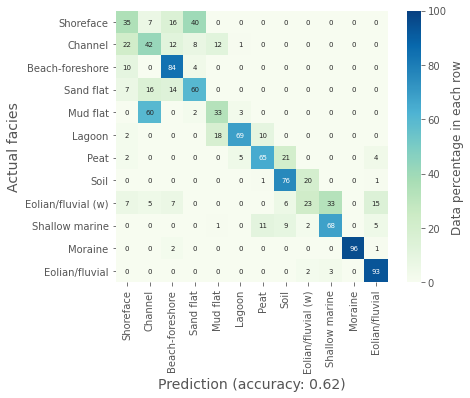

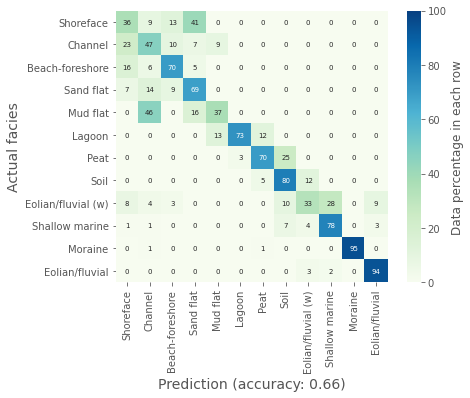

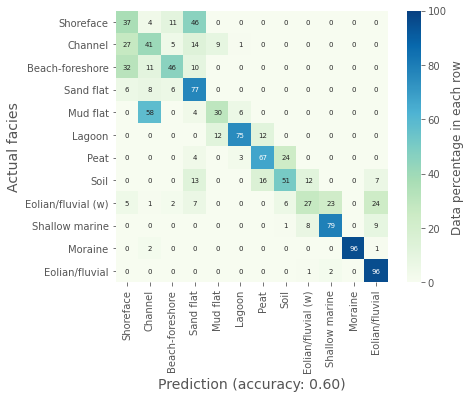

In [8]:
plot_recall(y_df, ['y_lr', 'y_svc', 'y_rf'], Facies, 'dev')

In [9]:
def detect_conjuction(data_df, y_preds, Facies, split):
    """
    data_df is the dataframe having info and labels.
    y_preds is a list of the column names of labels you want to plot.
    Faceis is a list of facies names.
    split is the name of the dataset, which used for filename (train or test).
    """
    
    data_df['id'] = range(len(data_df))
    mat_dict = {}


    for y_pred in y_preds:
        y_mean = []
        composite_id = []
        model_name = y_pred[2:] if len(y_pred)>1 else 'description'
        
        for section in np.unique(data_df.core_section):
            y_mean = np.hstack((y_mean, data_df.loc[data_df.core_section == section, y_pred].rolling(window = 2).mean()))
            composite_id = np.hstack((composite_id, data_df[data_df.core_section == section].index))

        # merge the rolling with the original label
        # this will lost the first data poit in each section, but it doesn't mater
        # because the boundary shouldn't be at the begining of each section
        tmp_df = pd.concat([data_df, pd.DataFrame({'y_mean': y_mean}, index = composite_id).dropna()], join = 'inner', axis = 1)

        # if y_pred is not same as y_mean, it means there is a boundary (facies change) between this and above depth
        bd_df = tmp_df[tmp_df[y_pred] != tmp_df.y_mean].copy()
        bd_df['ab_id'] = bd_df.id - 1
        if len(model_name) > 3:
            print('There are {} boundaries in description.'.format(len(bd_df)))
        else:
            print('There are {} boundaries in the optimized {} model\'s predictions.'.format(len(bd_df), model_name))

        # build matrix of boundaries
        bd_mat = np.zeros(shape = (12, 12), dtype = int)

        for row in bd_df.iterrows():
            tmp = np.zeros(shape = (12, 12), dtype = int)
            tmp[data_df[y_pred][int(row[1].ab_id)], data_df[y_pred][int(row[1].id)]] = 1
            bd_mat += tmp
            
        mat_dict[y_pred] = bd_mat
        
        # plot
        fig, ax = plt.subplots(1, 1, figsize = (7, 5))
        sns.heatmap(bd_mat, annot = bd_mat.astype(str), ax = ax, cmap = 'Greens', square = True, #vmin=0, vmax=130,
                    xticklabels = Facies, yticklabels = Facies, fmt = 's', 
                    annot_kws={'size': 7}, cbar_kws = {'label' : 'Counts (total: {})'.format(len(bd_df))}
                   )
        ax.set_xlabel('Below facies', size = 16)
        ax.set_ylabel('Above facies', size = 16)
        fig.savefig('results/2d_{}_conjunction_matrix_{}_{}.png'.format(split, model_name, date))
    
    return mat_dict

There are 1284 boundaries in the optimized lr model's predictions.
There are 1445 boundaries in the optimized svc model's predictions.
There are 1223 boundaries in the optimized rf model's predictions.


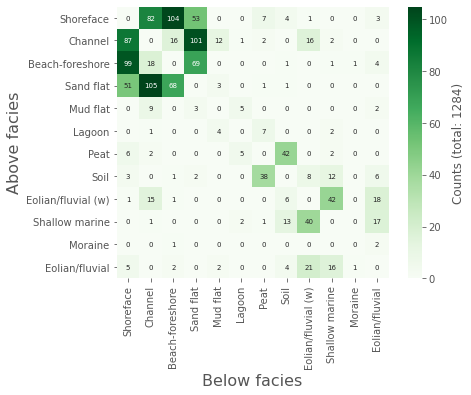

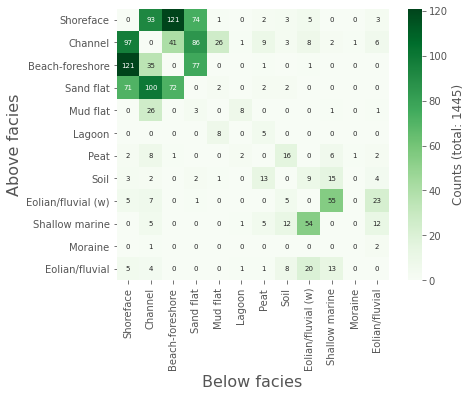

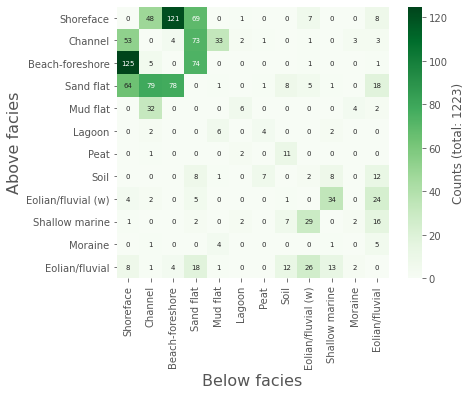

In [10]:
mat_dict = detect_conjuction(y_df,  ['y_lr', 'y_svc', 'y_rf'], Facies, 'dev')